In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
J1939 = pd.read_csv('data/J1939Faults.csv')

C:\Users\DP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
J1939.shape

(1187335, 20)

In [5]:
codes = pd.read_excel('data/Service Fault Codes_1_0_0_167.xlsx')

In [6]:
codes.shape

(7124, 14)

In [7]:
vehicle = pd.read_csv('data/VehicleDiagnosticOnboardData.csv')

In [8]:
vehicle.shape

(12821626, 4)

In [10]:
vehicle.head(20)

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
5,6,AcceleratorPedal,0,1
6,7,IntakeManifoldTemperature,78.8,1
7,8,FuelRate,0,1
8,9,FuelLtd,12300.907429328,1
9,10,EngineRpm,0,1


In [11]:
J1939.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [19]:
J1939.EquipmentID.value_counts()

1641         17216
1646         15174
1618         14774
1605         14748
1606         14654
             ...  
2208             1
105438645        1
105435406        1
105301976        1
105381862        1
Name: EquipmentID, Length: 1836, dtype: int64

In [51]:
codes[codes.SPN.isin([5246])]

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
2518,Y,3712,167,Not Mapped,Not Mapped,Not Mapped,0,5246,0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
2781,Y,4134,167,Not Mapped,Not Mapped,Not Mapped,0,5246,15,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement - Least Severe - Fault Code 371...
4338,Y,6254,167,Not Mapped,Not Mapped,Not Mapped,0,5246,16,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement Severit...,NaN


In [9]:
faults_onboard = pd.merge(J1939, vehicle, left_on='RecordID', right_on='FaultId', how='left')
#faults_onboard

In [10]:
sample = faults_onboard.head(10)

In [11]:
sample.drop(["ecuSoftwareVersion", "actionDescription", "ecuModel", "ecuMake", "faultValue"], axis = 1, inplace = True)
sample

C:\Users\DP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,1,IgnStatus,False,1
1,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,2,EngineOilPressure,0,1
2,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,3,EngineOilTemperature,96.74375,1
3,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,4,TurboBoostPressure,0,1
4,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,5,EngineLoad,11,1
5,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,6,AcceleratorPedal,0,1
6,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,7,IntakeManifoldTemperature,78.8,1
7,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,8,FuelRate,0,1
8,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,9,FuelLtd,12300.907429328,1
9,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,10,EngineRpm,0,1


In [12]:
faults_onboard[faults_onboard.spn.isin([5246])]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
418,46,990931,2015-02-21 12:10:51.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.065972,-86.433425,2015-02-21 12:11:27.000,419,IgnStatus,True,46
419,46,990931,2015-02-21 12:10:51.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.065972,-86.433425,2015-02-21 12:11:27.000,420,LampStatus,22527,46
16232,1919,1007751,2015-02-22 19:44:55.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.066203,-86.434814,2015-02-22 19:46:27.000,16233,IgnStatus,True,1919
16233,1919,1007751,2015-02-22 19:44:55.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.066203,-86.434814,2015-02-22 19:46:27.000,16234,LampStatus,22527,1919
17486,2059,1010486,2015-02-23 04:00:21.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.066666,-86.434537,2015-02-23 01:06:06.000,17487,LampStatus,1023,2059
17735,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,17736,IgnStatus,False,2090
17736,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,17737,FuelLtd,33470.466902374,2090
17737,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,17738,EngineTimeLtd,4645.45,2090
17738,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,17739,LampStatus,22527,2090
25573,2972,1026305,2015-02-23 15:54:22.000,NaN,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,25574,IgnStatus,True,2972


In [13]:
faults_onboard.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,1,IgnStatus,False,1
1,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,2,EngineOilPressure,0,1
2,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,3,EngineOilTemperature,96.74375,1
3,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,4,TurboBoostPressure,0,1
4,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,5,EngineLoad,11,1


In [14]:
failure_error_2 = faults_onboard.spn.isin([5246])
failure_error_2.head()

0    False
1    False
2    False
3    False
4    False
Name: spn, dtype: bool

In [15]:
failure_error = faults_onboard.spn.isin([1569]) & faults_onboard.fmi.isin([31])
failure_error.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [52]:
all_failures = failure_error_2 | failure_error
all_failures.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [18]:
failed_trucks = faults_onboard[all_failures].EquipmentID.astype(str).unique()
failed_trucks

array(['1721', '1395', '1515', '1630', '1487', '1499', '1329', '1365',
       '1419', '1486', '1509', '1492', '1340', '1328', '1430', '1370',
       '1497', '1350', '1473', '1608', '1606', '1612', '1354', '1493',
       '1583', '1465', '1335', '1789', '1383', '1389', '1501', '1438',
       '1463', '1514', '1666', '1689', '1692', '1357', '1396', '310',
       '1602', '1660', '1445', '1431', '105393153', '1327', '1795',
       '1399', '1494', '1367', '1364', '1452', '1595', '1740', '1366',
       '1339', '1425', '1358', '1646', '1391', '1428', '1338', '1637',
       '1346', '1490', '1562', '1433', '1663', '1417', '1424', '1771',
       '1790', '1591', '1797', '1596', '1421', '1547', '1444', '1480',
       '1466', '1457', '105360462', '1794', '1696', '1703', '1626',
       '1715', '1437', '1453', '1584', '1597', '1610', '1377', '1652',
       '105411041', '1517', '1784', '1751', '1786', '1590', '1341',
       '1382', '1714', '1711', '1369', '1398', '1791', '1772', '1472',
       '1418', '

In [19]:
failed_truck_df = faults_onboard[faults_onboard.EquipmentID.isin(failed_trucks)]

In [31]:
failed_truck_df.drop(["ecuSoftwareVersion", "actionDescription", "ecuModel", "ecuMake", "faultValue"], axis=1, inplace = True)

In [37]:
failed_truck_df = failed_truck_df.sort_values(["EquipmentID", "EventTimeStamp"], ascending = (False, True))
failed_truck_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
140,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,141,Throttle,0,20
141,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,142,IgnStatus,True,20
142,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,143,EngineOilPressure,28.42,20
143,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,144,EngineOilTemperature,192.1438,20
144,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,145,FuelTemperature,32,20
145,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,146,AcceleratorPedal,0,20
146,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,147,TurboBoostPressure,0.58,20
147,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,148,EngineLoad,28,20
148,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,149,FuelLtd,6823.035759056,20
149,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,150,IntakeManifoldTemperature,122,20


In [55]:
truck_310 = failed_truck_df[failed_truck_df.EquipmentID.isin(['310'])]


,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
140,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,141,Throttle,0,20
141,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,142,IgnStatus,True,20
142,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,143,EngineOilPressure,28.42,20
143,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,144,EngineOilTemperature,192.1438,20
144,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,145,FuelTemperature,32,20
145,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,146,AcceleratorPedal,0,20
146,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,147,TurboBoostPressure,0.58,20
147,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,148,EngineLoad,28,20
148,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,149,FuelLtd,6823.035759056,20
149,20,990544,2015-02-21 11:18:20.000,High Voltage (Fuel Level),unknown,49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,150,IntakeManifoldTemperature,122,20


In [56]:
truck_310['EventTimeStamp'] = pd.to_datetime(truck_310['EventTimeStamp'])
truck_310['Year'] = pd.DatetimeIndex(truck_310['EventTimeStamp']).year
truck_310['Month'] = pd.DatetimeIndex(truck_310['EventTimeStamp']).month
truck_310

C:\Users\DP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,...,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Year,Month
140,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,141,Throttle,0,20,2015,2
141,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,142,IgnStatus,True,20,2015,2
142,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,143,EngineOilPressure,28.42,20,2015,2
143,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,144,EngineOilTemperature,192.1438,20,2015,2
144,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,145,FuelTemperature,32,20,2015,2
145,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,146,AcceleratorPedal,0,20,2015,2
146,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,147,TurboBoostPressure,0.58,20,2015,2
147,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,148,EngineLoad,28,20,2015,2
148,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,149,FuelLtd,6823.035759056,20,2015,2
149,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),unknown,49,96,3,True,126,...,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,150,IntakeManifoldTemperature,122,20,2015,2


In [70]:
truck_310_2018 = truck_310[truck_310.Year.isin([2018])]
truck_310_2018

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,...,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Year,Month
10545132,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568531,Throttle,100,1017355,2018,5
10545133,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568532,IgnStatus,True,1017355,2018,5
10545134,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568533,EngineOilPressure,17.98,1017355,2018,5
10545135,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568534,EngineOilTemperature,210.0313,1017355,2018,5
10545136,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568535,EngineLoad,14,1017355,2018,5
10545137,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568536,TurboBoostPressure,1.45,1017355,2018,5
10545138,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568537,AcceleratorPedal,0,1017355,2018,5
10545139,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568538,FuelLtd,36166.738951112,1017355,2018,5
10545140,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568539,FuelRate,0.6340149,1017355,2018,5
10545141,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568540,IntakeManifoldTemperature,131,1017355,2018,5


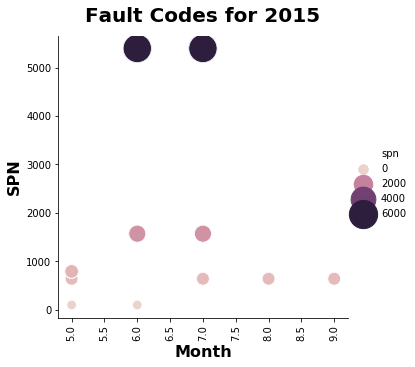

In [71]:
g= sns.relplot(x="Month", y="spn", hue="spn", size="spn", sizes=(90, 800), data=truck_310_2018)
g.set_xticklabels(rotation=90)
g.axes[0,0].set_xlabel('Month', size = 16, weight = 'bold')
g.axes[0,0].set_ylabel('SPN', size = 16, weight = 'bold')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Fault Codes for 2015", size = 20, weight = 'bold');

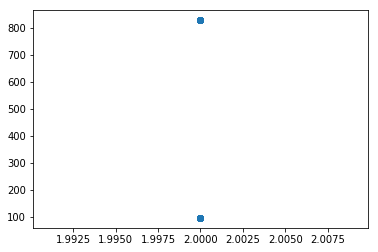

In [68]:
plt.scatter(x=truck_310_2015['Month'], y=truck_310_2015['spn'])
plt.show()

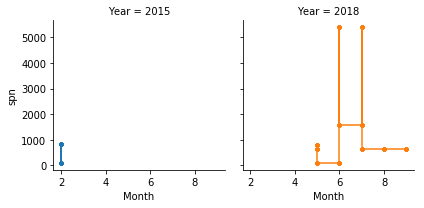

In [65]:
grid = sns.FacetGrid(truck_310, col="Year", hue="Year")
grid.map(plt.plot, "Month","spn", marker='.');